<a href="https://colab.research.google.com/github/syedatif4118/iris-with-decision-tree/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://drive.google.com/drive/folders/11NfF84XtZKVt1WIAPx_kb7rJPTM4lktI
!pip uninstall gdown -y && pip install gdown
!gdown --folder https://drive.google.com/drive/folders/11NfF84XtZKVt1WIAPx_kb7rJPTM4lktI

Found existing installation: gdown 4.4.0
Uninstalling gdown-4.4.0:
  Successfully uninstalled gdown-4.4.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=2c18f0c8c3d1c09862de138425891c98eb7e90ad37f4def7b36ac015c2c2eba1
  Stored in directory: /root/.cache/pip/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
Retrieving folder list
Processing file 1iphCPSA74BiqVx2huq3wI2gUzxKVhRmv dataset_1.csv
Processing file 1SQmbf8QjZZi8j-B0nUdQ2lmq7oLp1VRV dataset_2.csv
Processing file 1sOtKwUgdctiOc_vwSImjKwKS0SR0sLKk dataset_3.csv
Processing file 1Yi62psryxFY7-_HzkdumON8ZJ1El0Nh7 dataset_4.csv
Processing file 15zFpFtmteRA8Sikqx_aKpDqkBcewczG4 readme.txt
Retrieving folder list completed
Building directo

##Importing necessary libraries

In [ ]:
import pandas as pd
import glob
import io
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Reading the csv file and creating a panda dataframe

In [ ]:

df = pd.read_csv(r'/content/ML_round_dataset/dataset_1.csv')
df

,Id,Feature_1,Feature_2,Feature_3,Feature_4,target
0,1,5.1,3.5,1.4,0.2,Class_1
1,2,4.9,3.0,1.4,0.2,Class_1
2,3,4.7,3.2,1.3,0.2,Class_1
3,4,4.6,3.1,1.5,0.2,Class_1
4,5,5.0,3.6,1.4,0.2,Class_1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Class_3
146,147,6.3,2.5,5.0,1.9,Class_3
147,148,6.5,3.0,5.2,2.0,Class_3
148,149,6.2,3.4,5.4,2.3,Class_3


In [ ]:
df.shape

(150, 6)

In [ ]:
df['target'].value_counts()

Class_1    50
Class_2    50
Class_3    50
Name: target, dtype: int64

##Data Cleaning

In [ ]:
df.isnull().any().any()

False

In [ ]:
df.columns
cols = list(df.columns)
cols

['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'target']

##Plotting

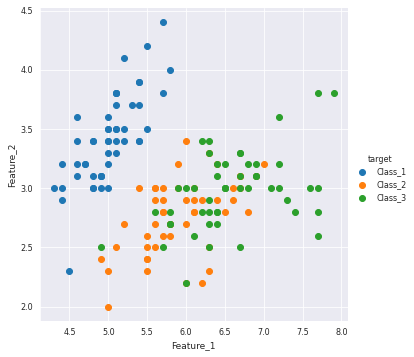

In [ ]:
sns.set_context(font_scale=2, rc={'font.size':8, 'axes.labelsize':9})
sns.set_style('darkgrid')
sns.FacetGrid(df, hue='target', height=5)\
.map(plt.scatter, 'Feature_1', 'Feature_2')\
.add_legend()

plt.show()

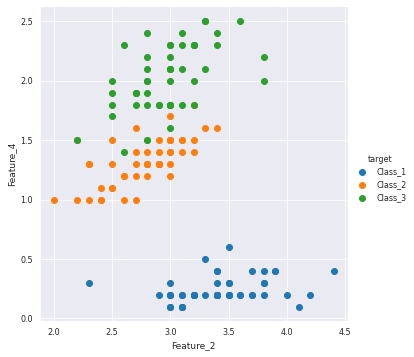

In [ ]:
sns.set_context(font_scale=2, rc={'font.size':8, 'axes.labelsize':9})
sns.set_style('darkgrid')
sns.FacetGrid(df, hue='target', height=5)\
.map(plt.scatter, 'Feature_2', 'Feature_4')\
.add_legend()

plt.show()

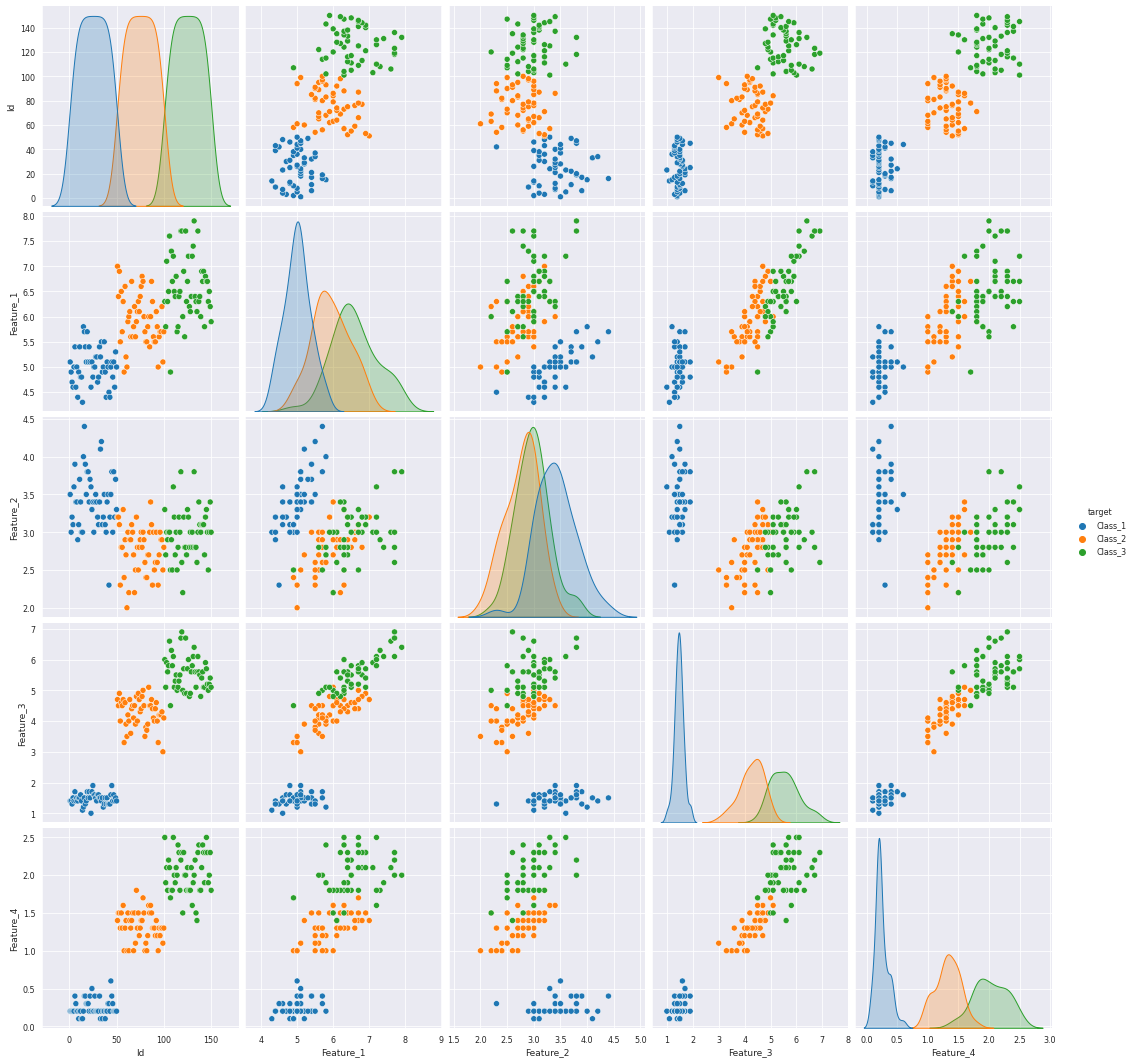

In [ ]:
sns.pairplot(df, hue='target', height=3)

In [ ]:
df.target

0      Class_1
1      Class_1
2      Class_1
3      Class_1
4      Class_1
        ...   
145    Class_3
146    Class_3
147    Class_3
148    Class_3
149    Class_3
Name: target, Length: 150, dtype: object

##Linear Regression

In [ ]:
x_values = df['Feature_3'].copy()
y_values = df['Feature_4'].copy()

In [ ]:
x_train, x_test, y_train1, y_test1 = train_test_split(x_values, y_values, test_size = 0.33, random_state = 3)

##Regression Libraries

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

##Adding dummy variables

In [ ]:
target_dummy = pd.get_dummies(df["target"])
target_dummy.head()

,Class_1,Class_2,Class_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
assigned_data = df.copy()

In [ ]:
assigned_data = pd.concat([df, target_dummy], axis = 1)
assigned_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,target,Class_1,Class_2,Class_3
0,0.222222,3.5,1.4,0.2,Class_1,1,0,0
1,0.166667,3.0,1.4,0.2,Class_1,1,0,0
2,0.111111,3.2,1.3,0.2,Class_1,1,0,0
3,0.083333,3.1,1.5,0.2,Class_1,1,0,0
4,0.194444,3.6,1.4,0.2,Class_1,1,0,0


In [ ]:
target = ['Class_1','Class_2', 'Class_3']
features = cols[0:4]
print(target)
print(features)

['Class_1', 'Class_2', 'Class_3']
['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4']


In [ ]:
y = assigned_data[target].copy()
X = assigned_data[features].copy()

###Dividing the data into training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [ ]:
print(X_train.describe())
X_train.head()

        Feature_1   Feature_2   Feature_3   Feature_4
count  135.000000  135.000000  135.000000  135.000000
mean     0.436008    3.055556    3.814815    1.221481
std      0.226388    0.428581    1.746960    0.760733
min      0.000000    2.000000    1.000000    0.100000
25%      0.222222    2.800000    1.600000    0.300000
50%      0.416667    3.000000    4.500000    1.400000
75%      0.583333    3.300000    5.100000    1.800000
max      1.000000    4.200000    6.700000    2.500000


,Feature_1,Feature_2,Feature_3,Feature_4
40,0.194444,3.5,1.3,0.3
72,0.555556,2.5,4.9,1.5
135,0.944444,3.0,6.1,2.3
113,0.388889,2.5,5.0,2.0
42,0.027778,3.2,1.3,0.2


In [ ]:
y_train.head(10)

,Class_1,Class_2,Class_3
40,1,0,0
72,0,1,0
135,0,0,1
113,0,0,1
42,1,0,0
126,0,0,1
112,0,0,1
141,0,0,1
76,0,1,0
5,1,0,0


In [ ]:
classifier = DecisionTreeClassifier(max_leaf_nodes = 4, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

In [ ]:
y_prediction = classifier.predict(X_test)

In [ ]:
y_prediction[0 : 10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [ ]:
y_test[0:10]

,Class_1,Class_2,Class_3
47,1,0,0
3,1,0,0
31,1,0,0
25,1,0,0
15,1,0,0
118,0,0,1
89,0,1,0
6,1,0,0
103,0,0,1
65,0,1,0


##Accuracy of the Classifier

In [ ]:
accuracy_score(y_true = y_test, y_pred = y_prediction)

1.0

##Confusion matrix, recall and f1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3

   micro avg       1.00      1.00      1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15
 samples avg       1.00      1.00      1.00        15

